# Thesis Plotter

## Imports and Methods

In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.kinematic_cuts as cuts
import my_library.constants as constants
import my_library.gluex_style as gxs

Welcome to JupyROOT 6.24/04


In [2]:
def title_hists(hist: list, xtitle, ytitle):
    titled_hists = []
    for hist in hist:
        hist.GetXaxis().SetTitle(xtitle)
        hist.GetYaxis().SetTitle(ytitle)

    

# Make Plots for My Thesis 

In [3]:
ROOT.EnableImplicitMT()

In [4]:
df_pipkmks = tools.get_dataframe('pipkmks', 'gluex1', 'data', filtered=False)
df_pimkpks = tools.get_dataframe('pimkpks', 'gluex1', 'data', filtered=False)

## $M^{2}_{x}(pKK\pi)$

In [5]:
mx2_all_bins, mx2_all_xlow, mx2_all_xhigh = 1000, -0.1, 0.1
hist_mx2all_pipkmks = df_pipkmks.Histo1D(('mx2_all_pipkmks', 'mx2_all_pipkmks', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppipkmks')
hist_mx2all_pimkpks = df_pimkpks.Histo1D(('mx2_all_pimkpks', 'mx2_all_pimkpks', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppimkpks')

hist_mx2all_pipkmks_cut = df_pipkmks.Filter(cuts.MX2_PPIPKMKS_CUT).Histo1D(('mx2_all_pipkmks_cut', 'mx2_all_pipkmks_cut', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppipkmks')
hist_mx2all_pimkpks_cut = df_pimkpks.Filter(cuts.MX2_PPIMKPKS_CUT).Histo1D(('mx2_all_pimkpks_cut', 'mx2_all_pimkpks_cut', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppimkpks')

In [6]:
df_pipkmks_cut = df_pipkmks.Filter(cuts.MX2_PPIPKMKS_CUT)
df_pimkpks_cut = df_pimkpks.Filter(cuts.MX2_PPIMKPKS_CUT)


## $\vec{p}(p')$

In [7]:
pp_bins, pp_xlow, pp_xhigh = 500, 0, 3
hist_trange_pipkmks = df_pipkmks_cut.Histo1D(('trange_pipkmks', 'trange_pipkmks', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')
hist_trange_pimkpks = df_pimkpks_cut.Histo1D(('trange_pimkpks', 'trange_pimkpks', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')
hist_trange_pipkmks_cut = df_pipkmks_cut.Filter(cuts.P_P_CUT).Histo1D(('trange_pipkmks_cut', 'trange_pipkmks_cut', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')

# Draw Plots

In [8]:
path_to_plots = '/work/halld/home/viducic/plots/thesis/'

In [9]:
c = ROOT.TCanvas('c', 'c', 900, 900)

## $M^{2}_{x}(pKK\pi)$

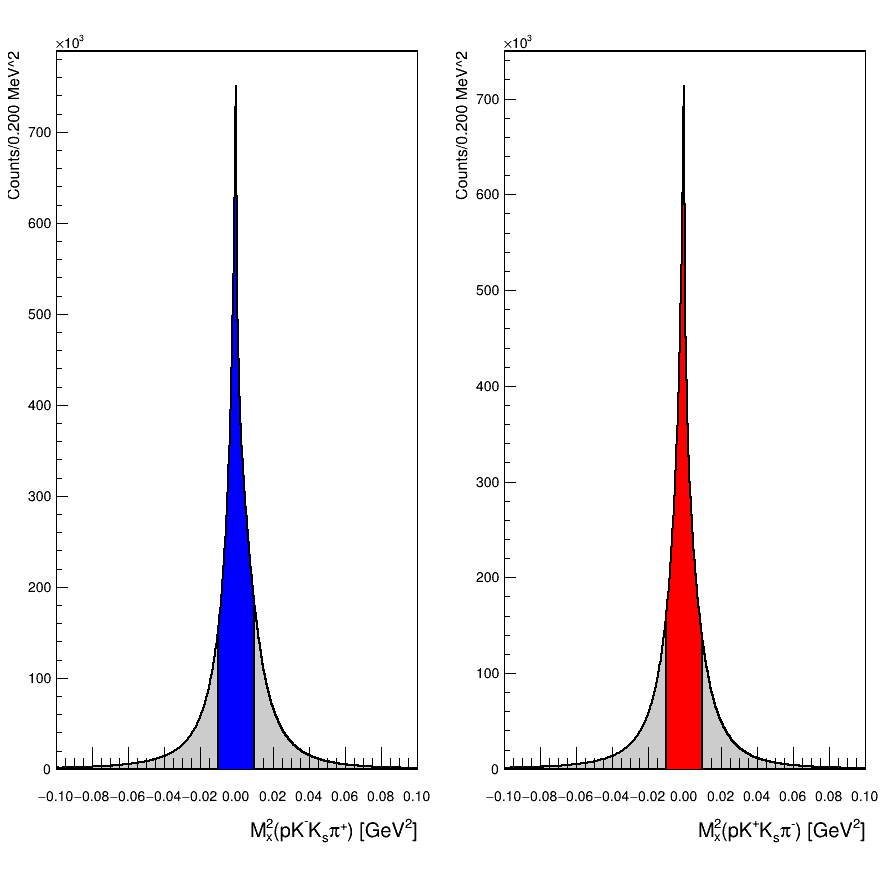

In [10]:
c.Clear()
c.Divide(2,1)

# mx2all_xtitle = 'M_{x}^{2}(pKK#pi) [GeV^{2}]'
hist_mx2all_pipkmks.GetXaxis().SetTitle('M_{x}^{2}(pK^{-}K_{s}#pi^{+}) [GeV^{2}]')
# mx2all_ytitle = f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.3f}' + ' MeV^{2}'
hist_mx2all_pipkmks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.3f} MeV^{2}')
hist_mx2all_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_mx2all_pipkmks.GetYaxis().SetTitleOffset(1.54)
hist_mx2all_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_mx2all_pipkmks.GetXaxis().SetTitleOffset(0.9)


hist_mx2all_pimkpks.GetXaxis().SetTitle('M_{x}^{2}(pK^{+}K_{s}#pi^{-}) [GeV^{2}]')
hist_mx2all_pimkpks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.3f} MeV^{2}')
hist_mx2all_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_mx2all_pimkpks.GetYaxis().SetTitleOffset(1.54)
hist_mx2all_pimkpks.GetXaxis().SetTitleSize(0.05)
hist_mx2all_pimkpks.GetXaxis().SetTitleOffset(0.9)

# title_hists([hist_mx2all_pimkpks, hist_mx2all_pipkmks], mx2all_xtitle, mx2all_ytitle)
# title_hists([hist_mx2all_pimkpks_cut, hist_mx2all_pipkmks_cut], mx2all_xtitle, mx2all_ytitle)
c.cd(1)
hist_mx2all_pipkmks.Draw()
hist_mx2all_pipkmks_cut.Draw('same')
c.cd(2)
hist_mx2all_pimkpks.Draw()
hist_mx2all_pimkpks_cut.Draw('same')

c.Draw()


## $\vec{p}(p')$

In [ ]:
c.Clear()
pp_xtitle = "t(p-p') [GeV^{2}]"
pp_ytitle = f'Counts/{1000*(pp_xhigh-pp_xlow)/pp_bins:.3f}' + ' MeV^{2}'
# TODO: plot impact of p cut on t
